# Activity 2.3 - CNN Network Architectures


#### Objective(s):

This activity aims to introduce how to use CNN network architectures


#### Intended Learning Outcomes (ILOs):

- Demonstrate how to use pretrained model in predicting the object
- Evaluate the accuracy of each pretrained model


#### Resources:

- Jupyter Notebook
- MNIST


#### Procedures

Load the necessary libraries


In [ ]:
# install opencv if you haven't
# pip install opencv-python
# pip install pillow

In [126]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd
import warnings
import cv2
from cv2 import imread

import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


Create a function that will capture and save the image from your webcam


In [1]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [74]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

- Test your function.
- Place a clock or any object
- Display the saved image


In [8]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

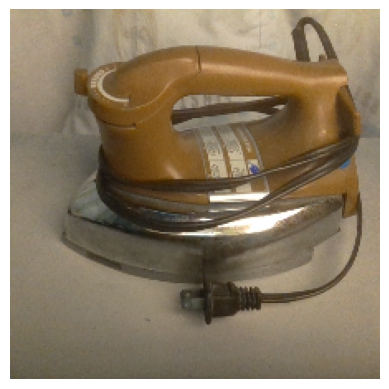

In [130]:
plt.imshow(imread(img_path))
plt.axis('off')
plt.show()

Use VGG-16 pre-trained model


In [10]:
from keras.applications import vgg16

vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Create a function to load model, image, preprocess input and targets


In [11]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result


In [12]:
vgg16_result = predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 2s 2s/step


In [131]:
vgg16_result

,Predicted Class,Name,Probability
0,n03584829,iron,0.815301
1,n04517823,vacuum,0.142809
2,n03791053,motor_scooter,0.005163
3,n04442312,toaster,0.005093
4,n04542943,waffle_iron,0.004880
5,n02951585,can_opener,0.003040
6,n03483316,hand_blower,0.002669
7,n04330267,stove,0.002160
8,n03187595,dial_telephone,0.001597
9,n02791124,barber_chair,0.001486


Interpret the result of prediction using VGG16 model


The displayed dataframe is already sorted from highest accuracy to the lowest. At the top, the item predicted is iron at 82%. Next is vacuum at 14%. The other objects are at less than 1%.

The VGG16 model is confident that the object from the image is an iron considering that the gap between the first and the others is huge. Its prediction is correct even though it is only at 82% accuracy.


Use Resnet50 pretrained model


In [13]:
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

Predict the result


In [14]:
resnet_result = predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 [==============================] - 2s 2s/step


In [132]:
resnet_result

,Predicted Class,Name,Probability
0,n03584829,iron,0.998399
1,n04517823,vacuum,0.000679
2,n04542943,waffle_iron,0.000490
3,n03791053,motor_scooter,0.000046
4,n03785016,moped,0.000041
5,n04442312,toaster,0.000032
6,n04560804,water_jug,0.000027
7,n04179913,sewing_machine,0.000023
8,n04554684,washer,0.000017
9,n03649909,lawn_mower,0.000016


Interpret the result using RESNET50 pretrained model


Just like the previous one, the displayed dataframe is already sorted from highest accuracy to the lowest. At the top, the item predicted is iron at 99%. The other objects are at less than 1%.

The RESNET50 model is highly confident that the object from the image is an iron considering that its accuracy reaches 99%. The model is correct at its prediction.


#### Supplementary Activity


- Use at least three pretrained model and predict the result using the saved image.
- Compare their accuracy results.


In [15]:
imread(img_path).shape

(224, 224, 3)

In [16]:
from keras.applications import InceptionV3, MobileNetV2, EfficientNetB7

inception_v3_model = InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax"
    )
inception_v3_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalizati

In [17]:
from keras.applications import inception_v3
inception_result = predict_image(inception_v3_model, img_path, inception_v3.preprocess_input, inception_v3.decode_predictions, (299,299,3))
inception_result.head()

1/1 [==============================] - 3s 3s/step


,Predicted Class,Name,Probability
0,n03584829,iron,0.999932
1,n04517823,vacuum,0.000015
2,n03649909,lawn_mower,0.000006
3,n04542943,waffle_iron,0.000004
4,n02264363,lacewing,0.000002


The displayed top predicted object is iron just like the previous two models. The Inception Model is also 99.99% sure that the object is iron. So far, the second predicted label is vacuum just like the other models. This is intuitive since vacuum and iron have shiny metals and bulky in shape.

InceptionV3 is correct!


In [18]:
mobnet_model =  MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax"
    )

mobnet_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_5[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [19]:
from keras.applications import mobilenet_v2
mobnet_result = predict_image(mobnet_model, img_path, mobilenet_v2.preprocess_input, mobilenet_v2.decode_predictions)
mobnet_result.head()

1/1 [==============================] - 3s 3s/step


,Predicted Class,Name,Probability
0,n03584829,iron,0.964904
1,n04542943,waffle_iron,0.021689
2,n04442312,toaster,0.001323
3,n04517823,vacuum,0.001051
4,n04560804,water_jug,0.000960


The displayed top predicted object is iron just like the previous 3 models. The MobileNet Model is 96% sure that the object is iron. Its second predicted label is waffle iron which is intuitive since vacuum and it has wires and made of metals too.

With its dominating label prediction, the Mobile Net Model is correct.


In [20]:
efficient_net_model = EfficientNetB7(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")

efficient_net_model.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 600, 600, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 600, 600, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 600, 600, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 600, 600, 3)          0         ['normalization[0

In [21]:
from keras.applications import efficientnet
effcient_net_result = predict_image(efficient_net_model, img_path, efficientnet.preprocess_input, efficientnet.decode_predictions, (600,600,3))
effcient_net_result.head()

1/1 [==============================] - 12s 12s/step


,Predicted Class,Name,Probability
0,n03584829,iron,0.826619
1,n04179913,sewing_machine,0.002466
2,n03187595,dial_telephone,0.000847
3,n04517823,vacuum,0.000836
4,n03483316,hand_blower,0.000774


The displayed top predicted object is iron just like the previous the other models. The EfficentNet Model is 83% sure that the object is iron. The other labels only reached less than 1%.

This means that the model is sure that it is iron. The EfficentNet Model is correct!


In [22]:
from keras.applications import DenseNet201, densenet
densetnet_model = DenseNet201(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
densetnet_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_7[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']

In [23]:
densenet_result = predict_image(densetnet_model, img_path, densenet.preprocess_input, densenet.decode_predictions)
densenet_result.head()

1/1 [==============================] - 8s 8s/step


,Predicted Class,Name,Probability
0,n03584829,iron,0.999935
1,n04252077,snowmobile,0.000024
2,n04517823,vacuum,0.000019
3,n04542943,waffle_iron,0.000010
4,n03649909,lawn_mower,0.000002


The displayed top predicted object is iron just like the previous models. The DenseNet Model is also 99.99% sure that the object is iron just like the ResNet50 and InceptionV3. The other items are obviously less than 1%.

DenseNet Model is sure that the object is iron and its prediction is correct.


In [129]:
results = [vgg16_result, resnet_result, inception_result, mobnet_result, effcient_net_result, densenet_result]
model_list = ['VGG16','ResNet50','InceptionV3','MobileNetV2','EfficientNetB7', 'DenseNet201']
probabilities = pd.DataFrame(columns=['Probability'])

for result in results:
    new_data = result.query('Name == "iron"')[['Probability']]
    probabilities.loc[len(probabilities)] = new_data.to_numpy()[0][0]
probabilities.insert(0,'Model',model_list)
print(probabilities)

            Model  Probability
0           VGG16     0.815301
1        ResNet50     0.998399
2     InceptionV3     0.999932
3     MobileNetV2     0.964904
4  EfficientNetB7     0.826619
5     DenseNet201     0.999935


Text(0.5, 1.0, 'Accuracy of the Pretrained Models in the Saved Image (Flat Iron)')

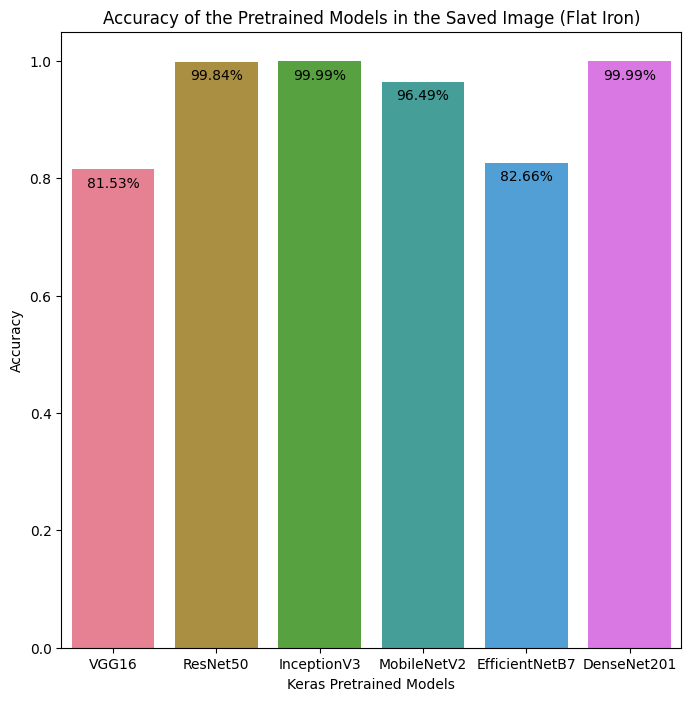

In [25]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x='Model',hue="Model", y="Probability", data=probabilities, palette="husl", legend=False)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()*100), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, -10), 
                textcoords = 'offset points')
plt.xticks()
plt.xlabel("Keras Pretrained Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of the Pretrained Models in the Saved Image (Flat Iron)")
plt.show()

Above is the bar graph of the accuracies of the models. There are three models that reached 99.99% namely; ResNet50, InceptionV3, and DenseNet201. MobNet is also high at 96% accuracy. These four models gave a highly accurate and correct predition on the image.

On the other hand, both VGG16 and EfficientNetB7 got less than 85% accuracy. Although it is low, they are still correct.

The 6 models are correct since they are not significantly confused by any other object. Most other objects probabilities only sits at less than 1%.


In [26]:
models = [vgg16_model,resnet50_model,inception_v3_model,mobnet_model,efficient_net_model,densetnet_model]
models_params = list()
models_params = [model.count_params() for model in models]

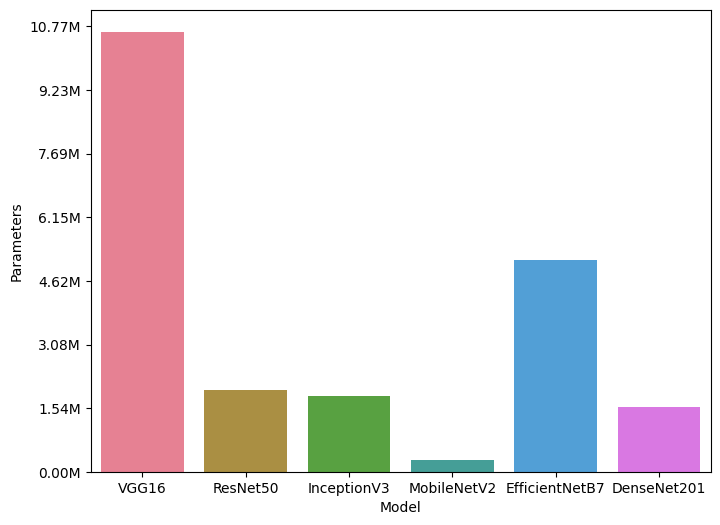

In [127]:
plt.figure(figsize=(8, 6))
esta_data = {'Model':model_list,'Parameters':models_params}
ax = sns.barplot(hue='Model',x='Model',y='Parameters',data=esta_data,palette='husl', legend=False)
tick_labels = ['{:.2f}M'.format(val / 13_000_000) for val in ax.get_yticks()]
ax.set_yticklabels(tick_labels)
plt.show()

Despite having the highest parameters, VGG16 produced the lowest accuracy on prediction the image. MobileNetV2 has a significantly lower parameters and it has a signifcanly more accurate prediction on the image at 96%. ResNet50, InceptionV3, and DenseNet201 have similar parameters at 1.5M while EfficientNetB7 is around 5M. Despite EfficientNetB7 having more parameters, the three models reached 99% unlike EfficientNetB7 at 82%.

Having more parameters in the model does not equate to a higher accuracy in predictions.


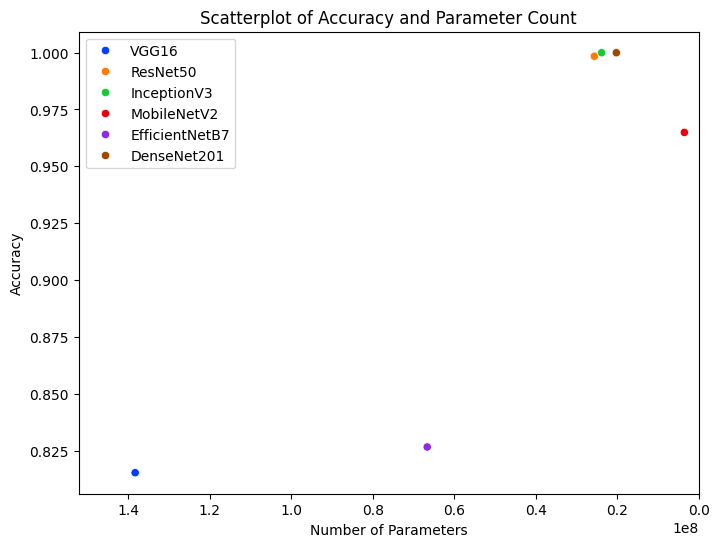

In [141]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    hue=model_list,
    x=models_params,
    y=probabilities['Probability'].to_numpy(),
    palette='bright',
    legend=True)
plt.xlabel('Number of Parameters')
plt.xlim(max(models_params)*1.1, 0)
plt.ylabel('Accuracy')
plt.title('Scatterplot of Accuracy and Parameter Count')
plt.show()

The scatterplot displays the parameters from highest to lowest going to the right and accuracy from low to high going up. From the plot, VGG16 is at low end having a low accuracy with extremely high parameters. Similarly, EfficientNetB7 have low accuracy with a huge number of parameters. Meanwhile, the top performing models can be seen at the top right indicating high accuracy and low number of parameters. ResNet50, InceptionV3, MobNetV2, and DenseNet201 performed well in predicting the given image.


#### Conclusion


Keras.applications is module in the Keras library, filled with pre-trained models for things like recognizing images and finding objects in pictures. These models are already trained on big sets of data, so we can use them to build our own projects without starting from scratch. Loading them in the project is easy, intuitive, and convenient.

Six models were used in the activity. Among them, VGG16 and EfficientNetB7 have the highest parameters yet the lowest accuracy in the saved image prediction. Additionally, ResNResNet50, InceptionV3, MobNetV2, and DenseNet201et50 performed well even though they only have 10% of VGG's parameters. MobileNetV2 is impressive having a 96% accuracy with a extremely small amount of parameters compared to the other models. Number of parameters does not always result to improved accuracy. Creating a good architecture is a good skill to learn too.
